In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')


In [2]:
df = pd.read_csv('../Dataset/kendaraan_train_pca_clean.csv')
df.sample(5)

,Component_1,Component_2,Tertarik
223156,-0.813079,1.060785,0
71493,2.064889,-0.178754,0
33848,0.876810,-0.966071,0
203818,0.655539,1.247170,0
119786,-1.404634,-0.186587,0


In [3]:
df_test = pd.read_csv('../Dataset/kendaraan_test_pca_clean.csv')
df_test.sample(5)

,Component_1,Component_2,Tertarik
43815,2.021487,-0.349030,0
31142,-1.613978,0.764544,0
42838,0.833017,-1.321528,0
13260,0.735345,2.276214,0
29399,-2.287982,0.221605,0


0    202945
1     27686
Name: Tertarik, dtype: int64


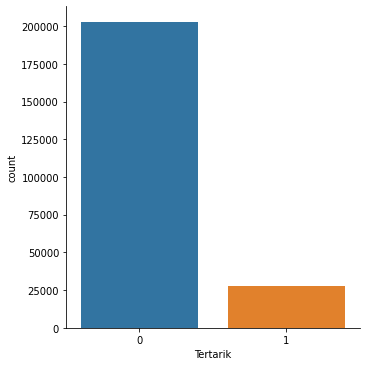

In [4]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [5]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [6]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42, n_jobs=-1, k_neighbors=7)
x_data, y_data = smt.fit_sample(x_data, y_data)


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (324712, 2)
x_test shape: (81178, 2)
---------------------------------
y_train shape: (324712,)
y_test shape: (81178,)


## **Tuning Model**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [9]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=5000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
]


In [10]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [11]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 79.94
Akurasi model Logistic Regression: 77.17
Akurasi model Gradient Boosting: 79.62
Akurasi model AdaBoost: 79.25
Akurasi model Random Forest: 83.59


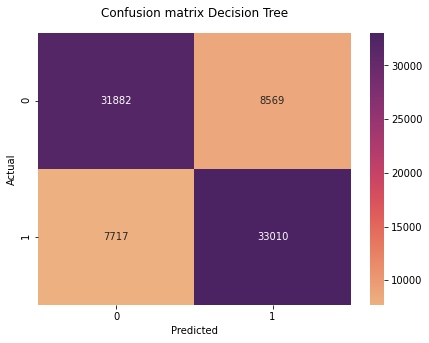


               precision    recall  f1-score   support

           0       0.81      0.79      0.80     40451
           1       0.79      0.81      0.80     40727

    accuracy                           0.80     81178
   macro avg       0.80      0.80      0.80     81178
weighted avg       0.80      0.80      0.80     81178




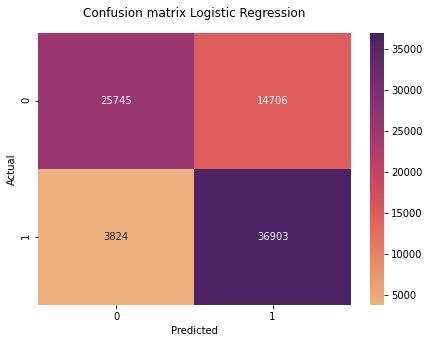


               precision    recall  f1-score   support

           0       0.87      0.64      0.74     40451
           1       0.72      0.91      0.80     40727

    accuracy                           0.77     81178
   macro avg       0.79      0.77      0.77     81178
weighted avg       0.79      0.77      0.77     81178




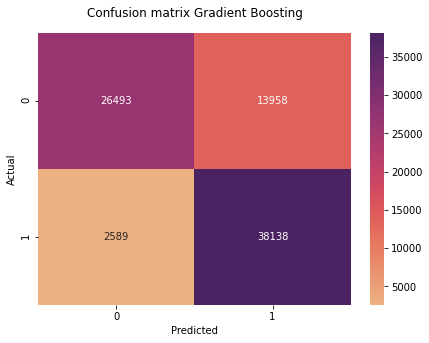


               precision    recall  f1-score   support

           0       0.91      0.65      0.76     40451
           1       0.73      0.94      0.82     40727

    accuracy                           0.80     81178
   macro avg       0.82      0.80      0.79     81178
weighted avg       0.82      0.80      0.79     81178




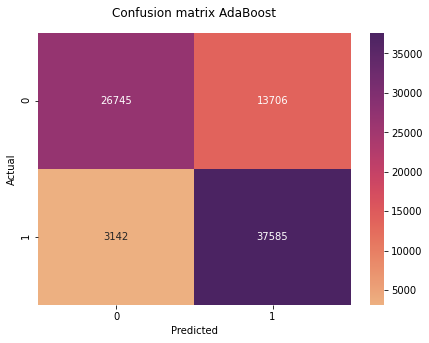


               precision    recall  f1-score   support

           0       0.89      0.66      0.76     40451
           1       0.73      0.92      0.82     40727

    accuracy                           0.79     81178
   macro avg       0.81      0.79      0.79     81178
weighted avg       0.81      0.79      0.79     81178




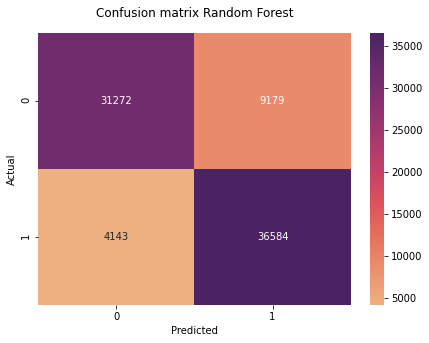


               precision    recall  f1-score   support

           0       0.88      0.77      0.82     40451
           1       0.80      0.90      0.85     40727

    accuracy                           0.84     81178
   macro avg       0.84      0.84      0.84     81178
weighted avg       0.84      0.84      0.84     81178




In [12]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result) 
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

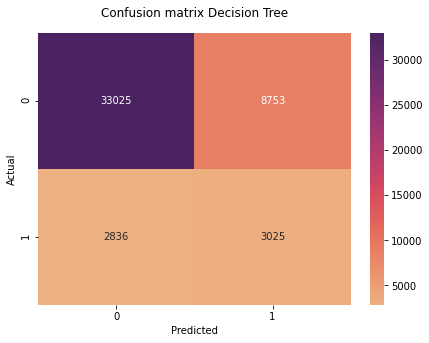


               precision    recall  f1-score   support

           0       0.92      0.79      0.85     41778
           1       0.26      0.52      0.34      5861

    accuracy                           0.76     47639
   macro avg       0.59      0.65      0.60     47639
weighted avg       0.84      0.76      0.79     47639




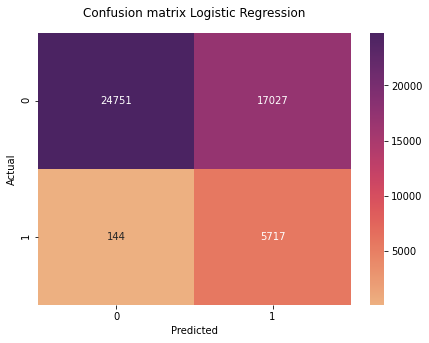


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




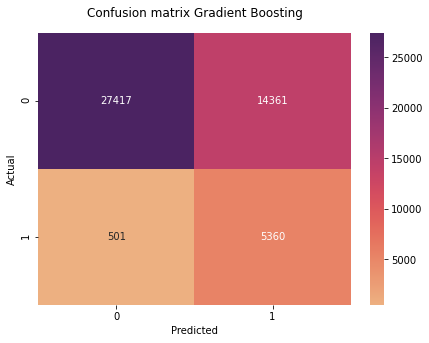


               precision    recall  f1-score   support

           0       0.98      0.66      0.79     41778
           1       0.27      0.91      0.42      5861

    accuracy                           0.69     47639
   macro avg       0.63      0.79      0.60     47639
weighted avg       0.89      0.69      0.74     47639




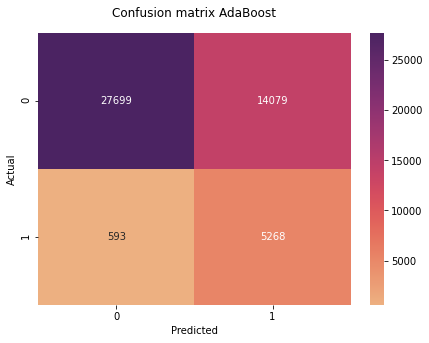


               precision    recall  f1-score   support

           0       0.98      0.66      0.79     41778
           1       0.27      0.90      0.42      5861

    accuracy                           0.69     47639
   macro avg       0.63      0.78      0.60     47639
weighted avg       0.89      0.69      0.74     47639




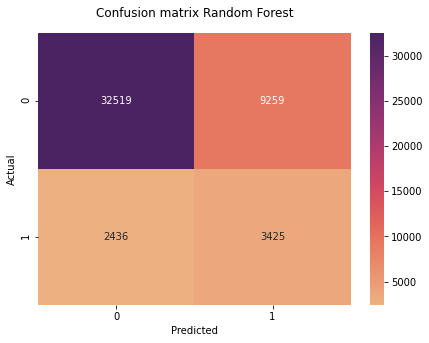


               precision    recall  f1-score   support

           0       0.93      0.78      0.85     41778
           1       0.27      0.58      0.37      5861

    accuracy                           0.75     47639
   macro avg       0.60      0.68      0.61     47639
weighted avg       0.85      0.75      0.79     47639




In [13]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
